In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline

Первый шаг – загрузить данные и убедиться, что всё считалось правильно: посмотреть на столбцы, типы данных, размерность, наличие пропущенных значений.

В каком столбце встретилось больше всего пропущенных значений? В качестве ответа укажите их число, после чего удалите строки с пропущенными значениями из датасета.

In [2]:
df = pd.read_csv('games.csv')

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [14]:
df.isna().sum().sort_values(ascending=False).head(3)

Year         271
Publisher     58
Rank           0
dtype: int64

In [15]:
df.shape

(16598, 11)

In [17]:
df.dropna(inplace=True)

In [18]:
df.shape

(16291, 11)

Проверим, какие переменные являются количественными, а какие категориальными. Соотнесите названия переменных с соответствующим типом данных.

In [19]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [20]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Выведите описательные характеристики переменной Year и постройте график распределения количества выпущенных игр по годам.

In [21]:
df.Year.describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

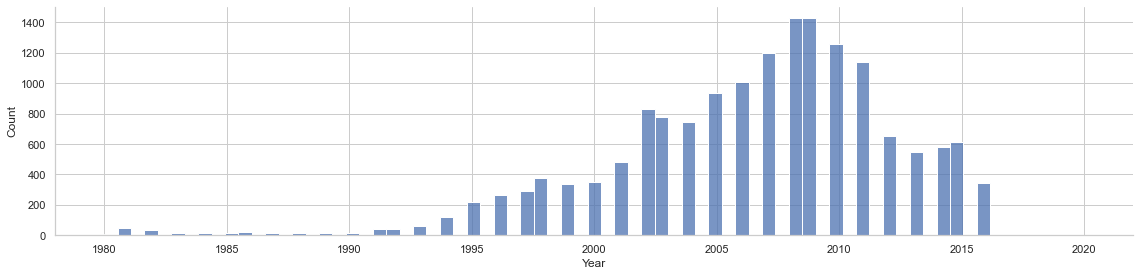

In [93]:
sns.displot(df, x='Year', height=4, aspect=4)

In [114]:
fig = px.histogram(df, x="Year", nbins=df.Year.nunique()+2)
fig.update_layout(bargap=0.2)
fig.show()

In [115]:
df.Year.mode()

0    2009.0
dtype: float64

In [119]:
print(f'{(df.Year > 2007).sum()} {(df.Year <= 2007).sum()}')

7993 8298


На каких платформах произошло больше всего релизов?

Оставьте названия только тех платформ, частота встречаемости которых составляет более 7%. Значения укажите в порядке убывания частоты встречаемости через запятую с пробелом.

Пример: 

'Wii', 'NES', 'GB'

In [133]:
release_by_platform = df.Platform.value_counts(normalize=True, ascending=False)

In [135]:
release_by_platform[release_by_platform > 0.07].index

Index(['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS'], dtype='object')

Игры каких издателей (Publisher) встречаются в датасете чаще всего?

В качестве ответа укажите наибольшую абсолютную частоту встречаемости.

In [137]:
df.Publisher.value_counts(ascending=False).head(3)

Electronic Arts       1339
Activision             966
Namco Bandai Games     928
Name: Publisher, dtype: int64

Сфокусируемся на играх от Nintendo. Посчитайте среднее, медиану и стандартное отклонение по продажам игр данного издателя в разных регионах (NA, EU, JP, Other). 

В каком регионе медианное значение объема продаж является наибольшим?

Hint: mean, median, std. Переменные: NA_sales и т.д. для нужных регионов.

In [151]:
sales = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
funcs = ['mean', 'median', 'std']
df.query('Publisher == "Nintendo"')[sales].apply(funcs).transpose().sort_values(by='median', ascending=False)

,mean,median,std
NA_Sales,1.172055,0.375,2.989913
JP_Sales,0.653721,0.280,1.063110
EU_Sales,0.601006,0.120,1.743953
Other_Sales,0.136767,0.030,0.464170


Теперь посмотрим на продажи Nintendo в Японии по жанрам. Постройте боксплот, где:

по оси x будет расположен жанр игры (Genre)
по оси у – объем продаж в Японии (JP_sales)
Взглянем на получившиеся боксплоты. Что мы можем по ним сказать о данных?

Hint: sns.boxplot(). Для удобства можете изменить размер графика, например: plt.figure(figsize=(16,16))

In [160]:
interests = ['JP_Sales', 'Genre']
df_JP_by_genre = df.query('Publisher == "Nintendo"')[interests]

In [162]:
df_JP_by_genre

,JP_Sales,Genre
0,3.77,Sports
1,6.81,Platform
2,3.79,Racing
3,3.28,Sports
4,10.22,Role-Playing
...,...,...
16269,0.01,Action
16357,0.01,Puzzle
16456,0.01,Misc
16473,0.01,Adventure


<AxesSubplot:xlabel='JP_Sales', ylabel='Genre'>

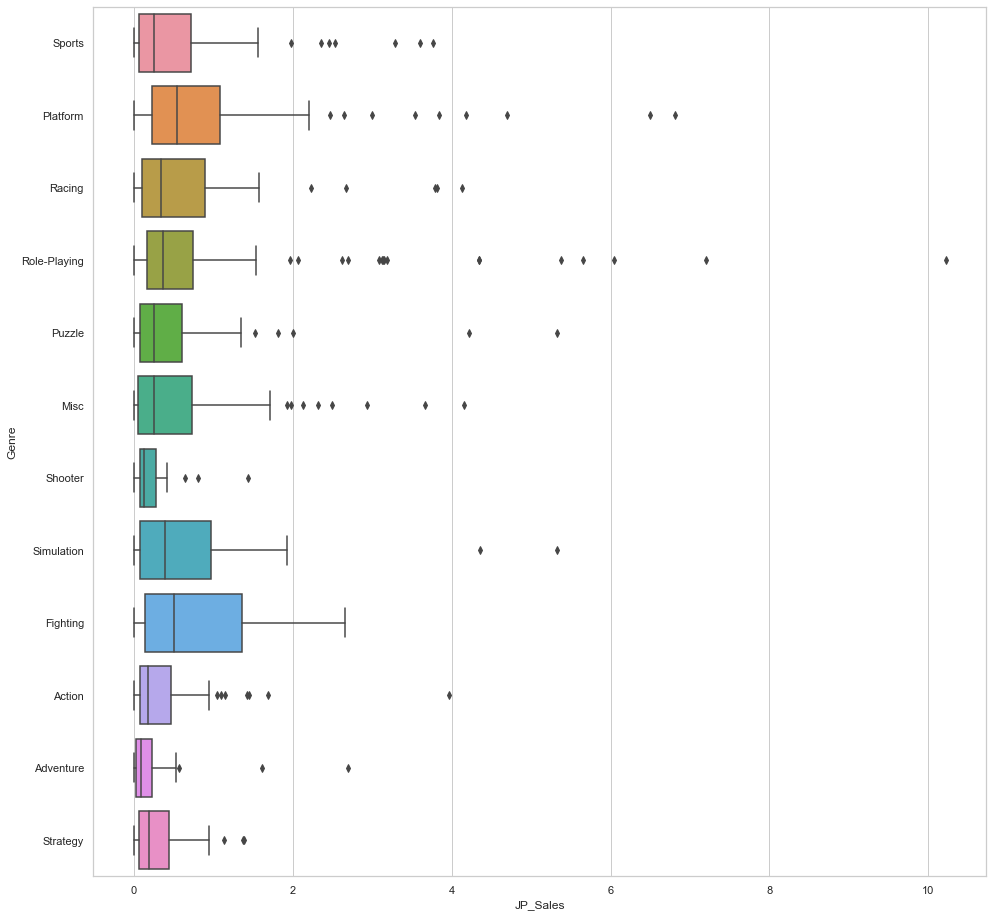

In [165]:
plt.figure(figsize=(16,16))
sns.boxplot(data=df_JP_by_genre, x='JP_Sales', y='Genre')

Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports.

На каком отрезке времени игры жанра Sports были наиболее популярны? Иными словами, выберите наименьший отрезок, который включает в себя несколько крупных пиков. 

In [184]:
interests = ['Global_Sales', 'Genre', 'Year']
genres = ['Fighting', 'Simulation', 'Platform', 'Racing', 'Sports']
df_global_sales = df.query('Publisher == "Nintendo" and Genre in @genres')[interests] \
    .groupby(by=['Year', 'Genre'], as_index=False) \
    .agg({'Global_Sales':'sum'})

In [185]:
fig = px.line(df_global_sales, x='Year', y='Global_Sales', color='Genre')
fig.update_layout(bargap=0.2)
fig.show()